In [1]:
import h5py
import torch
import numpy as np
import matplotlib.pyplot as plt

# with h5py.File(f'data_large/Burgers_train_100000_default.h5', 'r') as f:
#     # Traj_dataset.traj_train = torch.tensor(f['train']['pde_140-256'][:10000, :131], dtype=torch.float32, device=cfg.device)
#     traj = torch.tensor(f['train']['pde_140-256'][:1000, :131], dtype=torch.float32)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [2]:
import hydra
from omegaconf import DictConfig, OmegaConf
from generate_data import evolve
from tqdm import tqdm

hydra.initialize(config_path="cfg_flexible", version_base=None)
cfg = hydra.compose(config_name="config", overrides=["task=NS", "nt=14"])

In [3]:
with h5py.File(cfg.dataset.train_path, 'r') as f:
    # Traj_dataset.traj_train = torch.tensor(f['train']['pde_140-256'][:10000, :131], dtype=torch.float32, device=cfg.device)
    traj = torch.tensor(f['train']['pde'][:1000, :131:10], dtype=torch.float32)
    # traj = torch.tensor(f['train']['pde'][:128, 30:131:5], dtype=torch.float32)

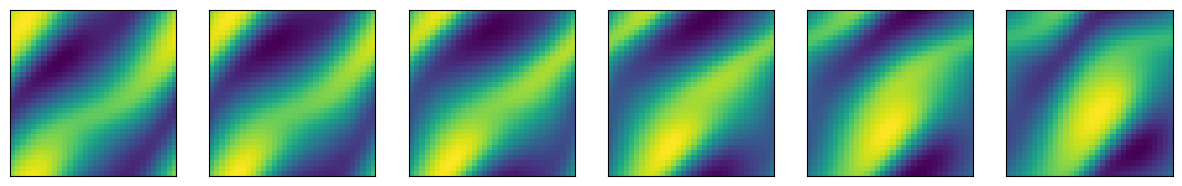

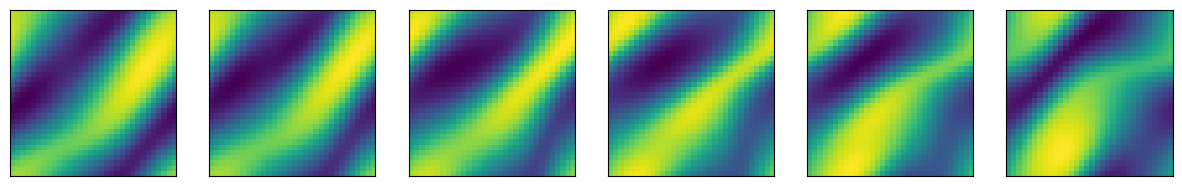

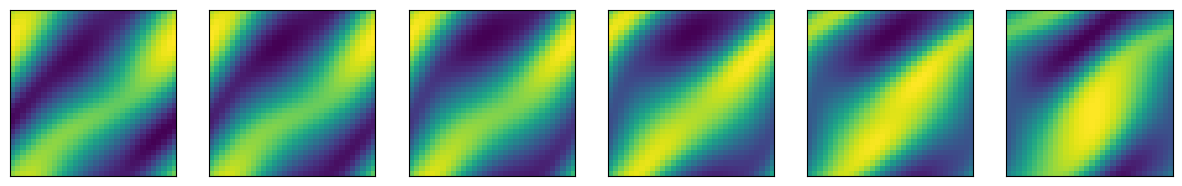

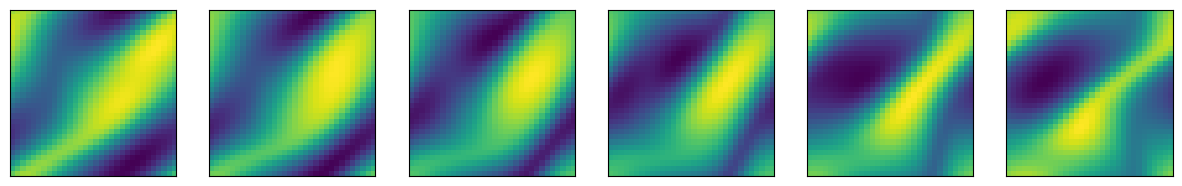

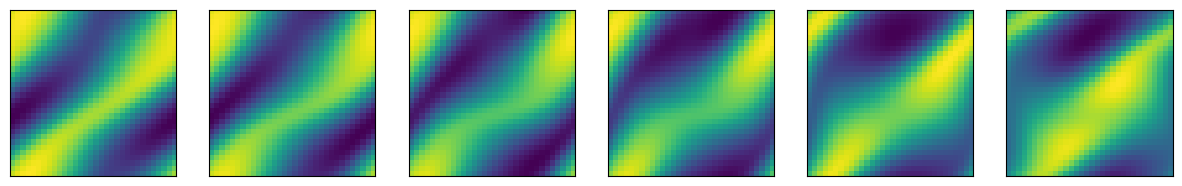

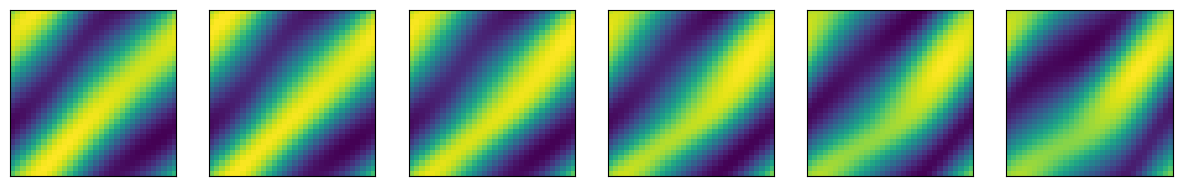

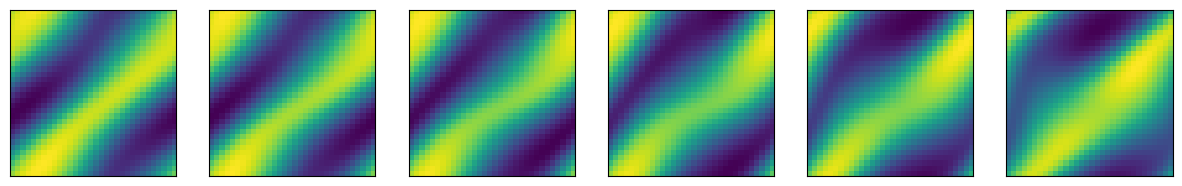

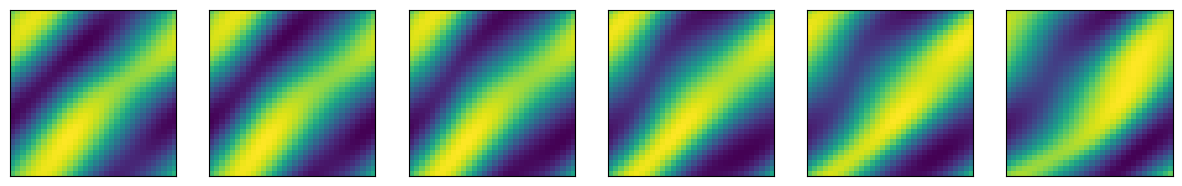

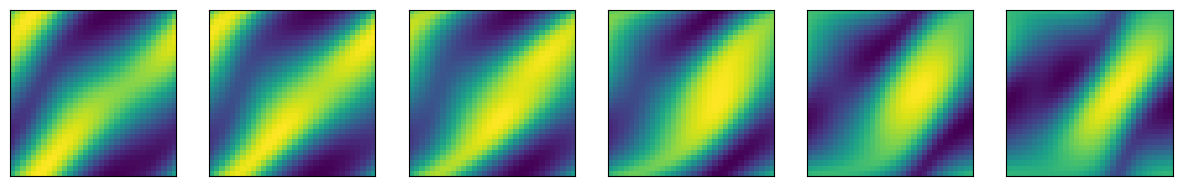

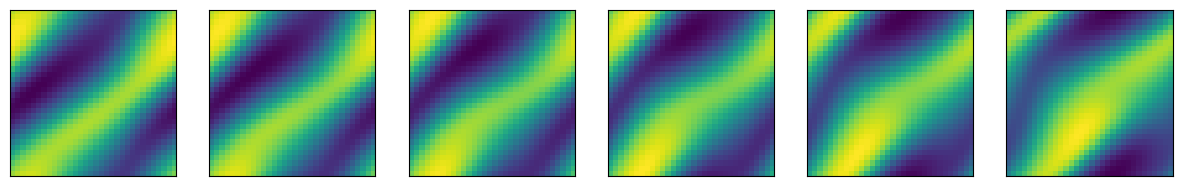

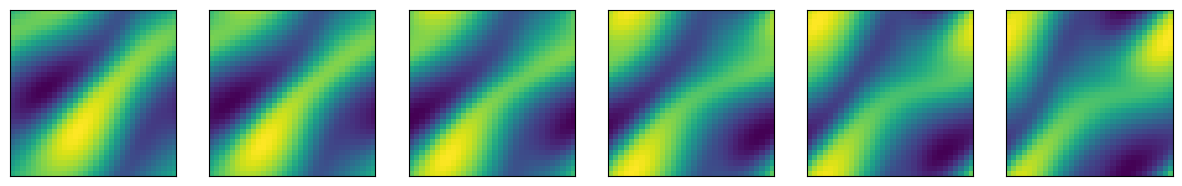

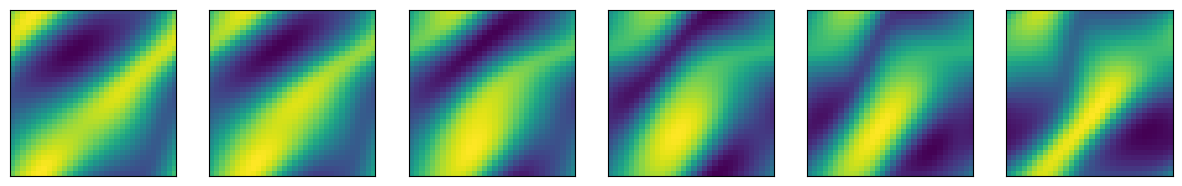

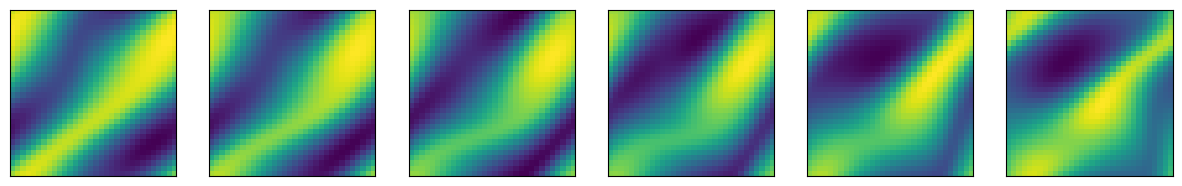

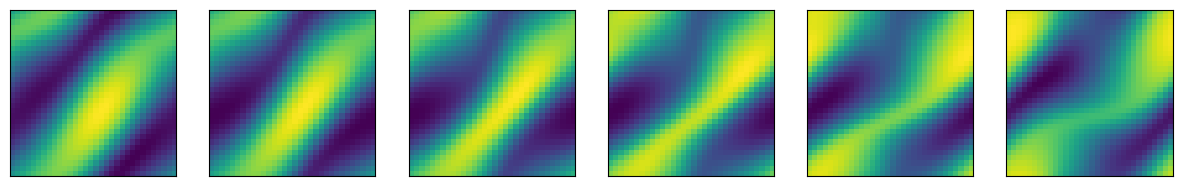

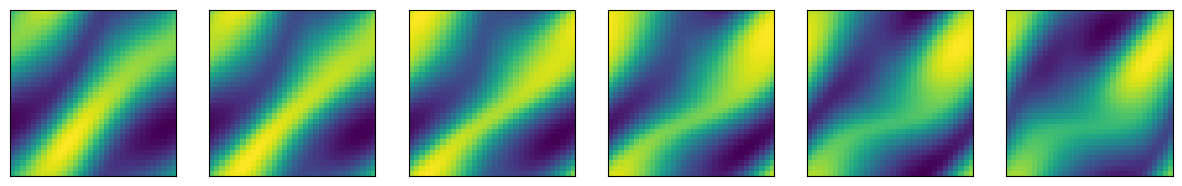

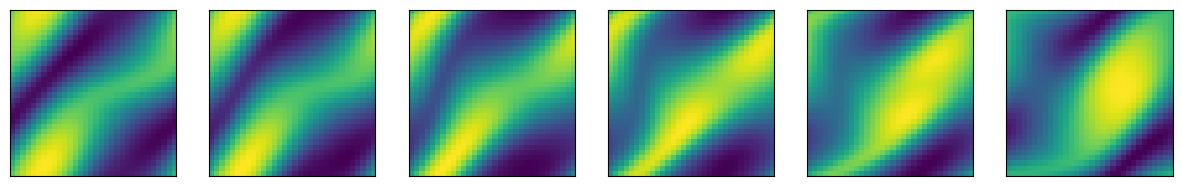

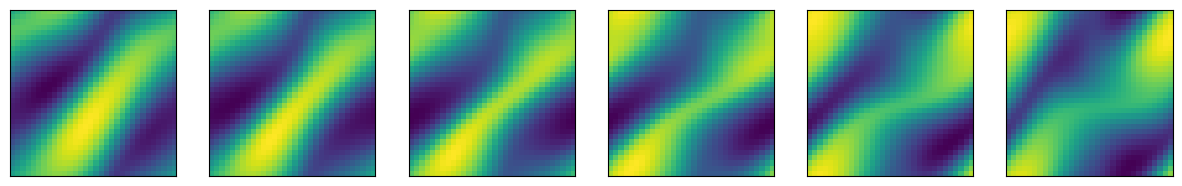

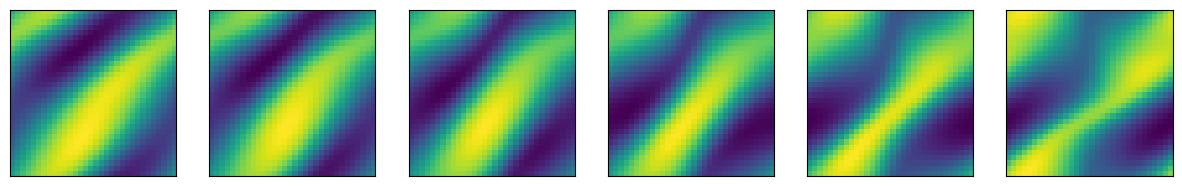

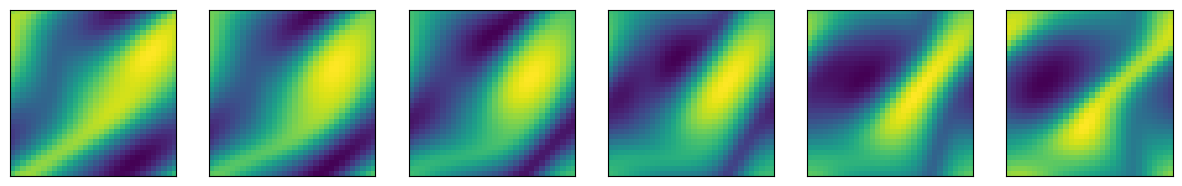

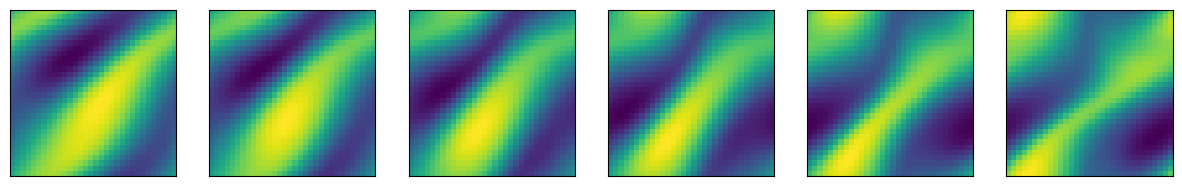

In [21]:
for k in range(500,520):
    plt.figure(figsize=(15, 3))
    for i in range(6):
        plt.subplot(1,6,i+1)
        plt.imshow(traj[k,i*2,0].cpu().numpy())
        plt.gca().axes.get_xaxis().set_visible(False)  # Hide x-axis
        plt.gca().axes.get_yaxis().set_visible(False)
        